# Disable GPU (if needed)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
%matplotlib inline
import matplotlib.pyplot as plt

# Keras API

In [2]:
from keras.layers import Activation, Conv2D, Input
from keras.layers import AvgPool2D
from keras.models import Model

def model_build_func(input_shape):
    activation = 'linear'
    padding='valid'
    
    inp = Input(shape=input_shape, name='input_image')
    x = Conv2D(32, (5, 5), padding=padding, activation=activation)(inp)
    x = Conv2D(32, (3, 3), padding=padding, activation=activation)(x)
    x = AvgPool2D()(x)
    x = Conv2D(64, (3, 3), activation=activation, padding=padding)(x)
    x = Conv2D(64, (3, 3), activation=activation, padding=padding)(x)
    x = AvgPool2D()(x)
    x = Conv2D(128, (3, 3), activation=activation, padding=padding)(x)
    x = Conv2D(128, (3, 3), activation=activation, padding=padding, name='feature_grid')(x)

    model = Model(inp, x)
    return model

model = model_build_func(input_shape=(96, 96, 3))
model.summary()

Using TensorFlow backend.
/home/mkk/anaconda3/envs/pmi36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 20, 20, 64)        0         
__________

## Load example image

In [3]:
from receptivefield.image import get_default_image

image = get_default_image(shape=(32, 32), tile_factor=1)
image.shape

(96, 96, 3)

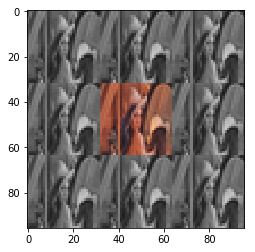

In [4]:
plt.imshow(image)
plt.savefig("../img/demo_keras_lena.jpg", dpi=126)

## Compute RF params for that network

In [5]:
from receptivefield.keras import KerasReceptiveField

rf = KerasReceptiveField(model_build_func, init_weights=False)

rf_params = rf.compute(
    input_shape=image.shape, 
    input_layer='input_image', 
    output_layer='feature_grid'
)
rf_params

/home/mkk/anaconda3/envs/pmi36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
[2017-11-25 22:38:59,771][ INFO][       keras.py]::Feature map shape: (None, 16, 16, 128)
[2017-11-25 22:38:59,771][ INFO][       keras.py]::Input shape      : (None, 96, 96, 3)
[2017-11-25 22:39:00,019][DEBUG][        base.py]::Computing receptive field at center (8, 8) with offset GridPoint(x=0, y=0)
[2017-11-25 22:39:00,332][DEBUG][        base.py]::Computing receptive field at center (8, 8) with offset GridPoint(x=1, y=1)


ReceptiveFieldDescription(offset=(17.0, 17.0), stride=(4.0, 4.0), size=Size(w=34, h=34))

In [6]:
rf.input_shape

GridShape(n=None, w=96, h=96, c=3)

In [7]:
rf.output_shape

GridShape(n=None, w=16, h=16, c=1)

## Plot example receptive field response

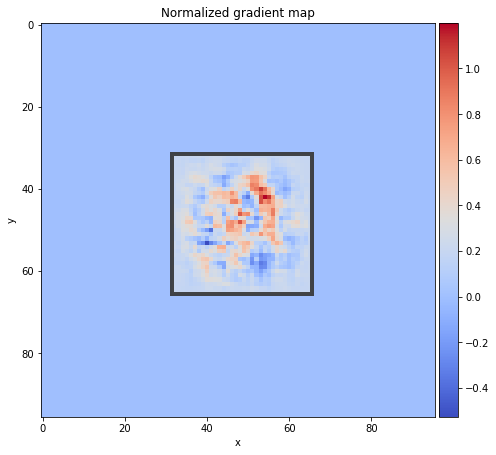

In [8]:

rf.plot_gradient_at((8, 8), image=None, figsize=(7, 7))

plt.savefig("../img/demo_keras_response.jpg", dpi=128)

## Debug receptive field

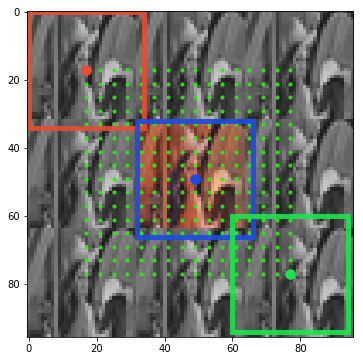

In [9]:
rf.plot_rf_grid(custom_image=image, figsize=(6, 6))
plt.savefig("../img/demo_keras_rf_debug.jpg", dpi=128)